In [291]:
library(devtools)
load_all()

ℹ Loading ghostbasil



In [292]:
generate.data <- function(n, p)
{
    X <- matrix(rnorm(n * p), n, p)
    X <- scale(X) / sqrt(n-1)
    C <- t(X) %*% X
    beta <- rnorm(p)
    y <- X %*% beta + rnorm(n)
    y <- t(X) %*% y
    list(C=C, y=y)
}

In [293]:
n <- 900
p <- 1000
data <- generate.data(n, p)
C <- data$C
y <- data$y
lmda = 0.1
step_size = 1 / max(eigen(C, T, T)$values)
print(step_size)
x = rep(0, p)

[1] 0.2413777


In [294]:
out <- solve_sub_coeffs__(C, y, lmda, step_size, x, max_iters=10000, 1e-12)

In [295]:
out.mix <- solve_sub_coeffs_mix__(C, y, lmda, step_size, x, max_cd_iters=2, max_iters=10000, tol=1e-12)

-1.52296e-09
1
0.1
121.058
0.278286
-7.4484e-09
1
0.1
123.056
0.131457
-1.61561e-08
1
0.1
131.851
0.133735
-8.45506e-09
1
0.1
133.092
0.125615
-0.070372
1
0.1
169.491
0.070372
-2.20888e-09
1
0.1
195.242
0.307131
-4.74589e-08
1
0.1
197.564
0.143004
-2.06652e-09
1
0.1
206.305
0.339713
-1.49109e-08
1
0.1
207.099
0.138634
-1.91247e-10
1
0.1
235.583
0.943888
-8.48194e-10
1
0.1
280.47
0.524577
2.79558e-10
1
0.1
293.852
0.577325
-0.00690776
1
0.1
294.182
0.00690776
-2.06606e-09
1
0.1
334.799
0.575822
-1.7194e-09
1
0.1
335.127
0.35899
-0.0862148
1
0.1
335.255
0.0862148
1.50783e-10
1
0.1
349.122
0.630208
6.97459e-08
1
0.1
360.774
0.155606
-1.28878e-09
1
0.1
362.053
0.686439
-2.07848e-10
1
0.1
362.519
0.961625
-1.02566e-08
1
0.1
373.299
0.304012
1.73094e-10
1
0.1
381.127
1.36778
-1.29749e-10
1
0.1
382.979
0.827084
-4.24063e-09
1
0.1
388.073
0.45558
5.94745e-08
1
0.1
388.278
0.152119
-6.12141e-10
1
0.1
397.331
0.926356
-8.68475e-09
1
0.1
398.181
0.197574
-4.1933e-10
1
0.1
398.22
0.877972
-5.37055

In [263]:
print(out.mix$beta)

   [1]  2.32311476 -3.16940136 -3.28181667 -3.55802503 -2.17695230  1.67638503
   [7] -0.17510119  0.15139027 -0.73645597 -1.47229140 -1.91969791  3.56638306
  [13]  0.44655050  1.57378802 -2.99028835 -0.36447087 -1.38283605  1.61206876
  [19] -1.14612036  0.08239956 -1.73229249  1.40799444 -0.63544194 -0.33042457
  [25] -2.79247374  2.83234467 -3.13826568 -2.38255740 -2.54616844 -2.26376316
  [31] -3.65869560  1.65170652  1.00884152  1.76911606 -1.56969828  3.12117910
  [37] -3.86676340 -0.07649531  2.23162298 -0.42518753 -1.65169207 -4.08875431
  [43]  1.62251682  1.68514633  3.38335464 -1.32184170 -1.63791274 -1.09921130
  [49] -2.35881941 -0.94769889 -1.38470400  2.93426273 -2.88442111 -0.20361875
  [55]  1.75227341 -2.15822723 -1.66019347 -1.96718355 -0.08018992  1.01586679
  [61] -0.57038677  2.13854464  4.62820065  1.13491565 -4.77164110  2.83073784
  [67]  0.99179261  2.39981838  3.17214141 -3.13492973 -2.13872010 -2.56138786
  [73]  1.49811007 -0.97223988 -2.74514957 -0.980182

In [166]:
print(out$beta[is.nan(out$beta)])
print(out$iters)
beta <- out$beta
nrm <- sqrt(sum(beta**2))
expected <- solve(C + lmda / nrm * diag(1, p, p), y)
print(sqrt(mean((expected-beta)**2)))

numeric(0)
[1] 401
[1] 0.0003777487


In [167]:
lmda2 <- lmda * 0.99
out2 <- solve_sub_coeffs__(C, y, lmda2, step_size, out$beta, max_iters=10000, 1e-12)

In [168]:
print(out2$beta[is.nan(out2$beta)])
print(out2$iters)
beta2 <- out2$beta
nrm2 <- sqrt(sum(beta2**2))
expected <- solve(C + lmda2 / nrm2 * diag(1, p, p), y)
print(sqrt(mean((expected-beta2)**2)))

numeric(0)
[1] 114
[1] 0.0002010755


## How does PCD behave with warm-start?

In [169]:
data <- generate.data(900, 1000)
C <- data$C
y <- data$y
lmda.max <- max(y)
lmdas <- lmda.max * 1.5 ** (-(1:20))
step_size <- 1 / max(eigen(C, T, T)$values)

In [170]:
x <- rep(0, length(y))
for (lmda in lmdas[1:5]) {
    start <- Sys.time()
    out.tmp <- solve_sub_coeffs__(C, y, lmda, step_size, x, max_iters=10000, 1e-12)
    end <- Sys.time()
    print(end-start)
    x <- out.tmp$beta
}

Time difference of 0.009838581 secs
Time difference of 0.009563684 secs
Time difference of 0.01212811 secs
Time difference of 0.01510978 secs
Time difference of 0.01839399 secs


In [176]:
a = 1
b = 2
c = 0.01
d = 0.31
e = -1
x_roots <- solve_quartic__(a, b, c, d, e)

[1] 167
[1] -2.220446e-16


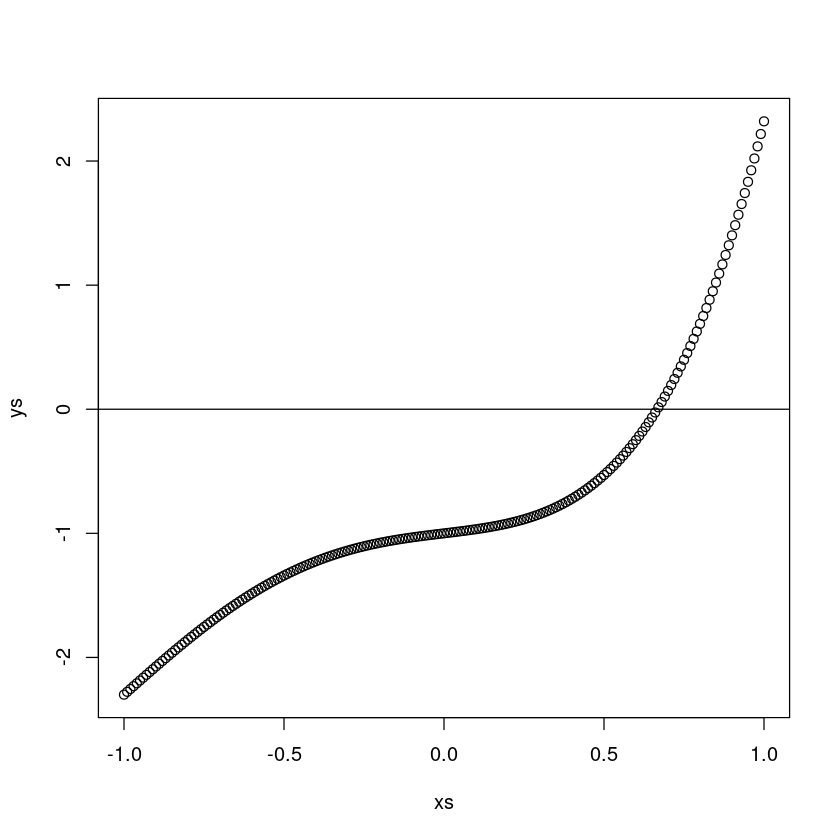

In [209]:
xs <- seq(-1, 1, 0.01)
quartic <- function(a,b,c,d,e,xs) {a * xs^4 + b * xs^3 + c * xs^2 + d * xs + e}
ys <- quartic(a,b,c,d,e,xs)
print(sum(ys < 0))
print(quartic(a,b,c,d,e,x_roots[2]))
plot(xs, ys)
abline(h=0)

In [210]:
sub_coord_desc <- function(a, b, c, d, x)
{
    x * (a + b / sqrt(x*x + c)) - d
}

In [254]:
a1 <- 1
b1 <- 0.1
c1 <- 8627.125123855891
d1 <- 0.1461198318242248
h <- solve_sub_coord_desc__(a1, b1, c1, d1)
print(h)
sub_coord_desc(a1, b1, c1, d1, h)

[1] NaN


[1] NaN